In [47]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import csv
import numpy as np

In [48]:
def draw_histogram(x, y, x_label, y_label, title, line=True): 
    fig, ax = plt.subplots(figsize=(10, 7))
    if line:
        plt.plot(x, y, 'r--')
    ax.bar(x, y, color='#5499C7', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=50)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#B0C4DE')
    fig.patch.set_facecolor('#154360')         
    plt.show()

In [49]:
def read_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    runners = dict()
    for child in root:
        runner, time = child.findall(".Runner")[0].text, float(child.findall(".Time")[0].text)
        runners[runner] = time
    return runners

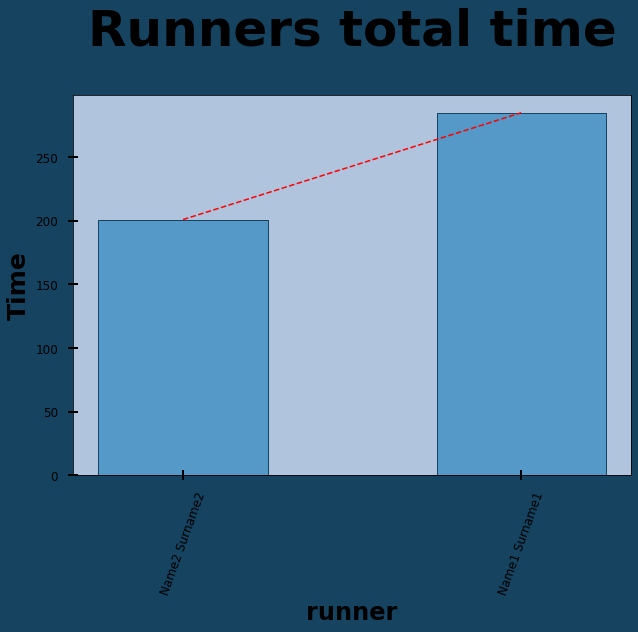

In [50]:
runners = read_xml("/Users/sophiyca/RiderProjects/LINQ_5/LINQ_5/result.XML")
draw_histogram(list(runners.keys()), list(runners.values()), "runner", "Time", "Runners total time", line=True)

In [51]:
task3 = pd.read_csv("task3.csv")
task3

,Runner,Speed,Etp
0,Surname1,3.000000,E3
1,Surname2,4.477612,E3
2,Surname2,4.477612,E3
3,Surname3,5.000000,E2
4,Surname4,5.882353,E2
5,Surname5,5.714286,E2
6,Surname6,27.777778,E3
7,Surname7,4.615385,E3


In [52]:
runners_names = set(task3["Runner"])

def task5(runner_name, plot=False):
    df1 = task3[task3["Runner"] == runner_name]
    if plot:
        pl = df1.sort_values(by='Etp', ascending=False)
        pl.plot(x='Etp', y='Speed', kind='bar', title=runner_name, figsize=(10, 5), rot=30, color= '#EB984E');
    display(df1)
  
interact(task5, runner_name=runners_names);

interactive(children=(Dropdown(description='runner_name', options=('Surname6', 'Surname4', 'Surname2', 'Surnam…

In [53]:
etaps = set(task3["Etp"])

def task5(etap, plot=False):
    df1 = task3[task3["Etp"] == etap]
    if plot:
        pl = df1.sort_values(by='Runner', ascending=False)
        pl.plot(x='Runner', y='Speed', kind='bar', title=etap, figsize=(10, 5), rot=30, color= '#EB984E');
    display(df1)
  
interact(task5, etap=etaps);

interactive(children=(Dropdown(description='etap', options=('E3', 'E2'), value='E3'), Checkbox(value=False, de…